In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [152]:
#Further, they want to build a business case to implement retention improvement initiatives by estimating the impact to key business metrics.

df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [153]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [154]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [155]:
#check if the max is reasonable
df[df['Average_Session_Length'] > 11.4]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
60,61,64,Other,West,2020-08-08 01:53:37.657676,Standard,14.99,Direct Debit,15.770722,Drama,Tablet,11.417557,1018,3,1,2021-03-15 01:53:37.657676,Price increase


In [156]:
df[df['Monthly_Hours_Watched'] > 139]

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
697,698,63,Female,South,2021-07-15 01:53:37.664613,Standard,14.99,Credit Card,139.170408,Sci-Fi,Mobile,1.332512,1064,2,0,NaN,NaN


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [158]:
#check for missing value
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64

In [159]:
# Fill missing values for non-churned users
df['Date_of_Churn'].fillna('Not Churned', inplace=True)
df['Reason_for_Churn'].fillna('Not Churned', inplace=True)
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,Not Churned,Not Churned
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,Not Churned,Not Churned
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,Not Churned,Not Churned
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,Not Churned,Not Churned
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,Not Churned,Not Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,Other,East,2020-10-26 01:53:37.667884,Basic,9.99,PayPal,0.700179,Documentary,Mobile,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service
996,997,66,Female,West,2020-05-06 01:53:37.667895,Standard,14.99,Credit Card,20.153308,Action,Mobile,3.222521,1069,4,0,Not Churned,Not Churned
997,998,52,Other,South,2019-06-19 01:53:37.667906,Standard,14.99,PayPal,39.170314,Drama,PC,1.221380,1079,1,0,Not Churned,Not Churned
998,999,69,Male,East,2020-11-13 01:53:37.667917,Standard,14.99,Credit Card,8.455372,Sci-Fi,Mobile,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service


In [160]:
## Convert 'Subscription_Start_Date' and 'Date_of_Churn' to datetime
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Date_of_Churn'] = df['Date_of_Churn'].apply(lambda x: pd.to_datetime(x) if x != 'Not Churned' else pd.NaT)

In [161]:
#calculate churn rate
df['Churned'].mean()

0.246

In [162]:
df.groupby('Subscription_Type')['Churned'].mean()

Subscription_Type
Basic       0.264493
Premium     0.252577
Standard    0.233962
Name: Churned, dtype: float64

In [163]:
# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Location'] = le.fit_transform(df['Location'])
df['Subscription_Type'] = le.fit_transform(df['Subscription_Type'])
df['Payment_Method'] = le.fit_transform(df['Payment_Method'])
df['Favorite_Genre'] = le.fit_transform(df['Favorite_Genre'])
df['Devices_Used'] = le.fit_transform(df['Devices_Used'])

In [164]:
#normalize
df['Hours_Watch_per_dolloar'] = df['Monthly_Hours_Watched'] / df['Monthly_Payment']
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Hours_Watch_per_dolloar
0,1,56,2,0,2020-06-07 01:53:37.656934,1,19.99,0,31.513153,0,1,1.195762,1023,5,0,NaT,Not Churned,1.576446
1,2,69,2,4,2024-02-21 01:53:37.656980,2,14.99,0,4.982277,3,1,0.809002,1076,1,0,NaT,Not Churned,0.332373
2,3,46,0,2,2022-10-06 01:53:37.656995,2,14.99,2,4.114953,4,3,1.153570,1095,2,0,NaT,Not Churned,0.274513
3,4,32,0,1,2022-01-04 01:53:37.657006,2,14.99,0,60.244820,0,2,0.609503,1003,1,0,NaT,Not Churned,4.019001
4,5,60,0,2,2020-03-13 01:53:37.657017,2,14.99,0,4.711855,4,0,0.359971,1012,4,0,NaT,Not Churned,0.314333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,2,1,2020-10-26 01:53:37.667884,0,9.99,2,0.700179,2,0,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,0.070088
996,997,66,0,4,2020-05-06 01:53:37.667895,2,14.99,0,20.153308,0,0,3.222521,1069,4,0,NaT,Not Churned,1.344450
997,998,52,2,3,2019-06-19 01:53:37.667906,2,14.99,2,39.170314,3,1,1.221380,1079,1,0,NaT,Not Churned,2.613096
998,999,69,1,1,2020-11-13 01:53:37.667917,2,14.99,0,8.455372,4,0,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,0.564068


In [165]:
#subscription duration
current_date = pd.to_datetime('2024-05-24')
def length(x):
    if x != 'Not Churned':
        return df['Date_of_Churn'] - df['Subscription_Start_Date']
    else:
        return pd.NaT

In [207]:
df['Subscription_Time_Length']=length('Reason_for_Churn')

In [197]:
# Interaction term between Monthly Payment and Average Session Length
df['Payment_Session_Interaction'] = df['Monthly_Payment'] * df['Average_Session_Length']
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Hours_Watch_per_dolloar,Subscription_Time_Length,Payment_Session_Interaction
0,1,56,2,0,2020-06-07 01:53:37.656934,1,19.99,0,31.513153,0,1,1.195762,1023,5,0,NaT,Not Churned,1.576446,NaT,23.903285
1,2,69,2,4,2024-02-21 01:53:37.656980,2,14.99,0,4.982277,3,1,0.809002,1076,1,0,NaT,Not Churned,0.332373,NaT,12.126935
2,3,46,0,2,2022-10-06 01:53:37.656995,2,14.99,2,4.114953,4,3,1.153570,1095,2,0,NaT,Not Churned,0.274513,NaT,17.292011
3,4,32,0,1,2022-01-04 01:53:37.657006,2,14.99,0,60.244820,0,2,0.609503,1003,1,0,NaT,Not Churned,4.019001,NaT,9.136445
4,5,60,0,2,2020-03-13 01:53:37.657017,2,14.99,0,4.711855,4,0,0.359971,1012,4,0,NaT,Not Churned,0.314333,NaT,5.395968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,2,1,2020-10-26 01:53:37.667884,0,9.99,2,0.700179,2,0,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,0.070088,139 days,33.074200
996,997,66,0,4,2020-05-06 01:53:37.667895,2,14.99,0,20.153308,0,0,3.222521,1069,4,0,NaT,Not Churned,1.344450,NaT,48.305590
997,998,52,2,3,2019-06-19 01:53:37.667906,2,14.99,2,39.170314,3,1,1.221380,1079,1,0,NaT,Not Churned,2.613096,NaT,18.308488
998,999,69,1,1,2020-11-13 01:53:37.667917,2,14.99,0,8.455372,4,0,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,0.564068,143 days,27.962504


In [198]:
df_1 = df[df['Churned'] == 1].sort_values(by=['Location','Age','Gender'],ascending=[False,True,False])
df_2 = df[df['Churned'] != 1]

In [208]:
df_1

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Hours_Watch_per_dolloar,Subscription_Time_Length,Payment_Session_Interaction
301,302,18,1,4,2021-10-03 01:53:37.660276,0,9.99,2,23.743519,4,2,2.048900,1069,2,1,2021-11-23 01:53:37.660276,Dissatisfied with content,2.376729,51 days,20.468506
562,563,19,1,4,2021-07-30 01:53:37.663154,2,14.99,1,6.089377,1,3,5.527631,1095,3,1,2021-11-22 01:53:37.663154,Found better service,0.406229,115 days,82.859185
57,58,19,0,4,2023-04-21 01:53:37.657644,2,14.99,2,8.938060,1,0,2.339363,1079,2,1,2023-05-28 01:53:37.657644,Price increase,0.596268,37 days,35.067053
166,167,21,2,4,2020-12-17 01:53:37.658813,0,9.99,0,16.215982,4,1,2.542078,1014,5,1,2021-11-18 01:53:37.658813,Price increase,1.623221,336 days,25.395356
871,872,21,2,4,2019-09-14 01:53:37.666552,2,14.99,1,4.379725,2,2,2.109266,1061,2,1,2019-10-14 01:53:37.666552,Found better service,0.292176,30 days,31.617900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,893,65,1,0,2019-07-15 01:53:37.666791,0,9.99,0,15.748378,1,0,1.628586,1009,1,1,2019-08-21 01:53:37.666791,Price increase,1.576414,37 days,16.269573
563,564,66,1,0,2024-03-15 01:53:37.663166,1,19.99,1,17.407975,0,0,0.947227,1036,4,1,2024-06-21 01:53:37.663166,Price increase,0.870834,98 days,18.935060
529,530,66,0,0,2022-05-05 01:53:37.662776,2,14.99,0,1.898513,1,0,0.433314,1044,5,1,2023-01-17 01:53:37.662776,Dissatisfied with content,0.126652,257 days,6.495374
456,457,68,0,0,2020-08-25 01:53:37.662015,2,14.99,2,29.037441,4,2,0.173380,1062,4,1,2021-05-25 01:53:37.662015,Price increase,1.937121,273 days,2.598968


In [200]:
df_2.describe()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Hours_Watch_per_dolloar,Subscription_Time_Length,Payment_Session_Interaction
count,754.000000,754.000000,754.000000,754.000000,754,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.0,0,754.000000,0,754.000000
mean,498.913793,44.779841,1.006631,2.043767,2021-09-29 07:03:01.057674496,1.269231,14.605385,0.576923,19.734607,1.980106,1.299735,1.885177,1048.795756,3.172414,0.0,NaT,1.418044,NaT,27.555391
min,1.000000,18.000000,0.000000,0.000000,2019-05-10 01:53:37.659073,0.000000,9.990000,0.000000,0.076891,0.000000,0.000000,0.000486,1000.000000,1.000000,0.0,NaT,0.003846,NaT,0.004854
25%,245.250000,32.000000,0.000000,1.000000,2020-05-30 01:53:37.659966464,0.000000,9.990000,0.000000,5.657050,1.000000,0.000000,0.516868,1023.000000,2.000000,0.0,NaT,0.396543,NaT,7.062348
50%,500.000000,45.500000,1.000000,2.000000,2021-09-25 13:53:37.661242112,2.000000,14.990000,0.000000,13.791423,2.000000,1.000000,1.271808,1047.500000,3.000000,0.0,NaT,0.961556,NaT,18.316570
75%,748.500000,57.000000,2.000000,3.000000,2023-01-16 13:53:37.662548480,2.000000,14.990000,1.000000,27.368681,3.000000,2.000000,2.612418,1074.000000,4.000000,0.0,NaT,1.942786,NaT,36.534966
max,1000.000000,70.000000,2.000000,4.000000,2024-05-06 01:53:37.662112,2.000000,19.990000,2.000000,139.170408,4.000000,3.000000,11.049324,1099.000000,5.000000,0.0,NaT,9.284217,NaT,177.708447
std,290.327761,15.250257,0.810757,1.448338,NaN,0.858011,3.377227,0.793431,19.866013,1.418293,1.185492,1.878760,28.851328,1.440076,0.0,NaN,1.471006,NaT,28.938134


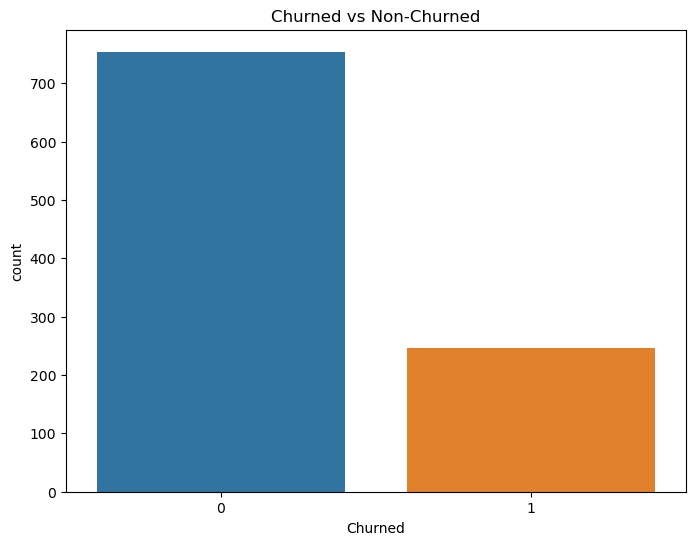

In [201]:
# Plot distribution of churned vs non-churned
plt.figure(figsize=(8, 6))
sns.countplot(x='Churned', data=df)
plt.title('Churned vs Non-Churned')
plt.show()

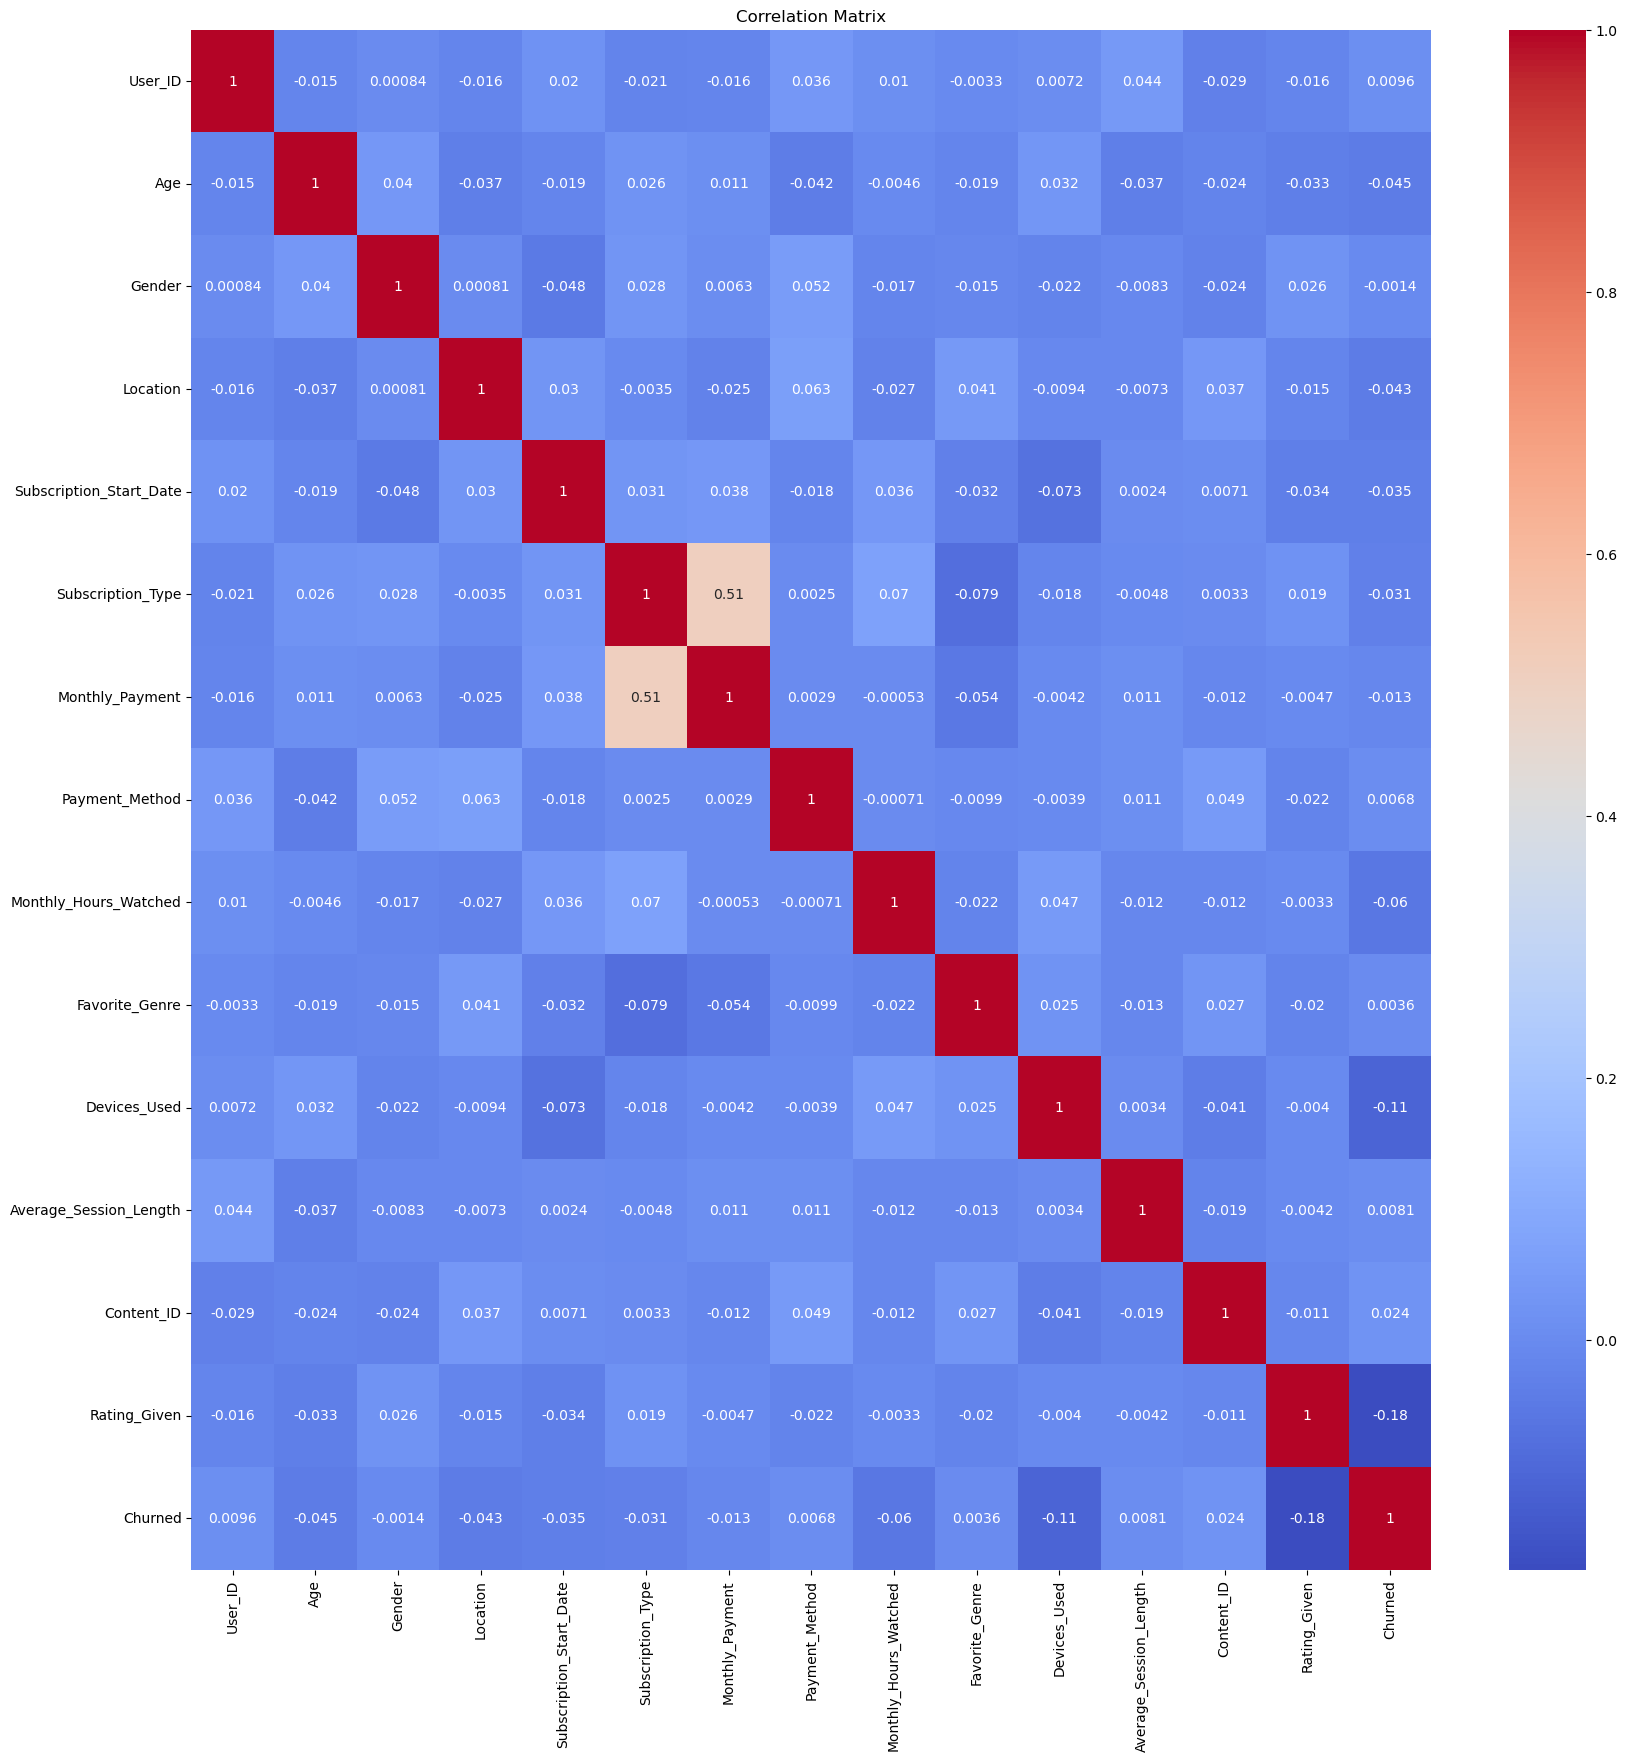

In [202]:
# Plot correlation matrix
plt.figure(figsize = (20,20))
sns.heatmap(df.iloc[:,:15].corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [203]:
df

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Hours_Watch_per_dolloar,Subscription_Time_Length,Payment_Session_Interaction
0,1,56,2,0,2020-06-07 01:53:37.656934,1,19.99,0,31.513153,0,1,1.195762,1023,5,0,NaT,Not Churned,1.576446,NaT,23.903285
1,2,69,2,4,2024-02-21 01:53:37.656980,2,14.99,0,4.982277,3,1,0.809002,1076,1,0,NaT,Not Churned,0.332373,NaT,12.126935
2,3,46,0,2,2022-10-06 01:53:37.656995,2,14.99,2,4.114953,4,3,1.153570,1095,2,0,NaT,Not Churned,0.274513,NaT,17.292011
3,4,32,0,1,2022-01-04 01:53:37.657006,2,14.99,0,60.244820,0,2,0.609503,1003,1,0,NaT,Not Churned,4.019001,NaT,9.136445
4,5,60,0,2,2020-03-13 01:53:37.657017,2,14.99,0,4.711855,4,0,0.359971,1012,4,0,NaT,Not Churned,0.314333,NaT,5.395968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,25,2,1,2020-10-26 01:53:37.667884,0,9.99,2,0.700179,2,0,3.310731,1035,1,1,2021-03-14 01:53:37.667884,Found better service,0.070088,139 days,33.074200
996,997,66,0,4,2020-05-06 01:53:37.667895,2,14.99,0,20.153308,0,0,3.222521,1069,4,0,NaT,Not Churned,1.344450,NaT,48.305590
997,998,52,2,3,2019-06-19 01:53:37.667906,2,14.99,2,39.170314,3,1,1.221380,1079,1,0,NaT,Not Churned,2.613096,NaT,18.308488
998,999,69,1,1,2020-11-13 01:53:37.667917,2,14.99,0,8.455372,4,0,1.865411,1092,2,1,2021-04-05 01:53:37.667917,Found better service,0.564068,143 days,27.962504


In [204]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [205]:
# Define features and target variable
#X = df.drop(columns=['User_ID', 'Subscription_Start_Date', 'Date_of_Churn', 'Reason_for_Churn', 'Churned','Subscription_Time_Length'])
#y = df['Churned']

# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
#rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#rf_model.fit(X_train, y_train)

# Predict on test set
#y_pred = rf_model.predict(X_test)

# Evaluate the model
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# Feature importance
#feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
#print(feature_importances)

[[136   2]
 [ 58   4]]
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       138
           1       0.67      0.06      0.12        62

    accuracy                           0.70       200
   macro avg       0.68      0.53      0.47       200
weighted avg       0.69      0.70      0.60       200

                             Importance
Content_ID                     0.121906
Average_Session_Length         0.121706
Hours_Watch_per_dolloar        0.118874
Monthly_Hours_Watched          0.116046
Payment_Session_Interaction    0.112493
Age                            0.104355
Rating_Given                   0.062755
Location                       0.050646
Favorite_Genre                 0.048970
Devices_Used                   0.038692
Gender                         0.033384
Payment_Method                 0.028396
Monthly_Payment                0.021747
Subscription_Type              0.020031
